In [3]:
from qiskit import *
from qiskit import QuantumCircuit
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from qiskit.visualization import plot_histogram
from MerminPeres import MerminPeresCircuit

Simulating the MerminPeresCircuit for each possible combination of x and y. Since this is a noiseless simulation, we expect to measure '0000' everytime

{'0000': 1024}
{'0000': 1024}
{'0000': 1024}
{'0000': 1024}
{'0000': 1024}
{'0000': 1024}
{'0000': 1024}
{'0000': 1024}
{'0000': 1024}


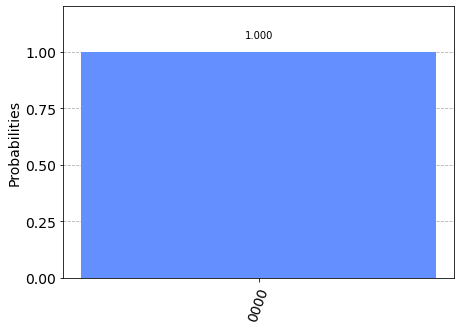

In [4]:
backend = Aer.get_backend('qasm_simulator')

for X in range(3):
        
    for Y in range(3):
    
        qc = MerminPeresCircuit(X, Y)
        
        t_qc = transpile(qc, backend)

        # Run and get counts
    
        job_sim = backend.run(t_qc, shots = 1024)
        result_sim = job_sim.result()
        counts = result_sim.get_counts(qc)
        print(counts) 
fig = plot_histogram(counts)

# Running on real devices

In [6]:
IBMQ.load_account()
IBMQ.providers()
provider = IBMQ.get_provider(hub = 'ibm-q')


In [7]:
qdevice = 'quito'
device = provider.get_backend('ibmq_{0}'.format(qdevice))

Running a specific situation in the Mermin-Peres game 

In [8]:
qc = MerminPeresCircuit(0, 1)
job = execute(qc, backend = device, shots = 1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)
device_result = job.result()

counts_01 = device_result.get_counts(qc) 

fig = plot_histogram(counts_01)

63458e8668409f1c842c58c4
Job Status: job is queued (9)     

KeyboardInterrupt: 

Running on quito for x = 0 and y = 0
63458ee26c7c487f9d6bd666
Job Status: job has successfully run
Running on quito for x = 0 and y = 1
6345912dd41d5e2b3dd31a76
Job Status: job has successfully run
Running on quito for x = 0 and y = 2
634591f06c7c489c726bd66d
Job Status: job has successfully run
Running on quito for x = 1 and y = 0
634592ecd31ce743dad811b4
Job Status: job has successfully run
Running on quito for x = 1 and y = 1
634593b468409f19222c58d3
Job Status: job has successfully run
Running on quito for x = 1 and y = 2
6345942dcbdc4da099c0f593
Job Status: job has successfully run
Running on quito for x = 2 and y = 0
634594aed41d5ee1fad31a82
Job Status: job has successfully run
Running on quito for x = 2 and y = 1
634595a7ea97ba6fa0e183f1
Job Status: job has successfully run
Running on quito for x = 2 and y = 2
634596acd41d5ea98ed31a85
Job Status: job has successfully run


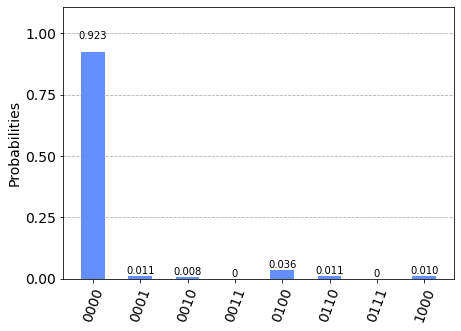

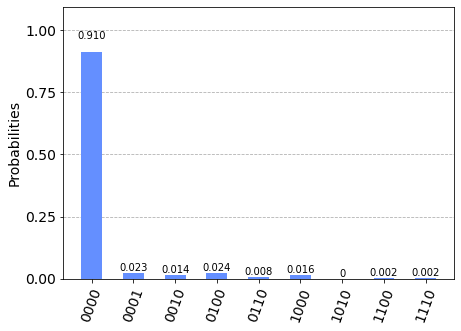

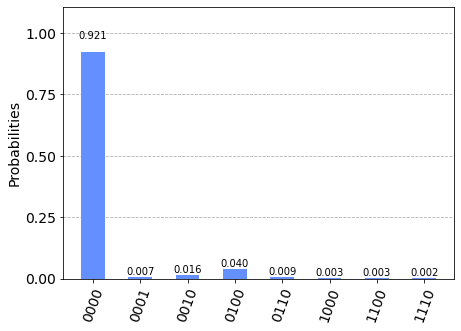

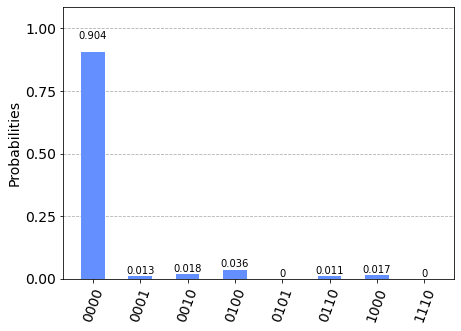

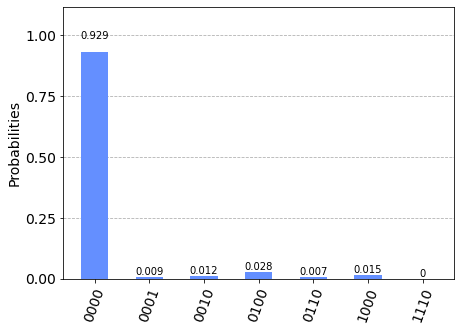

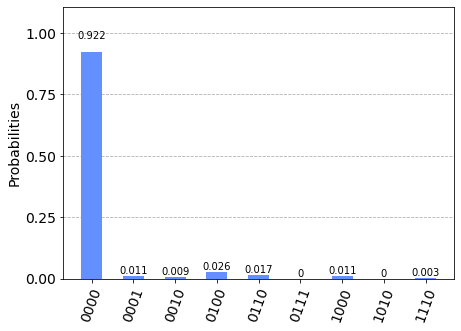

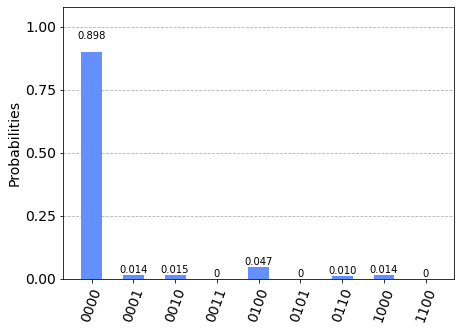

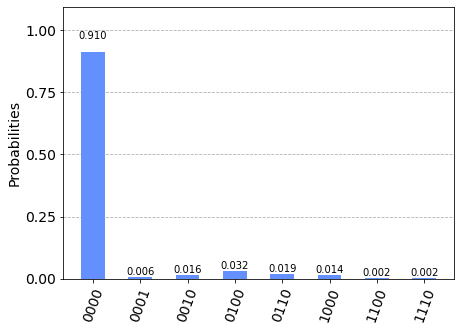

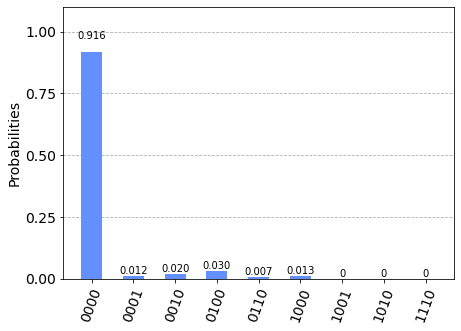

In [9]:
counts = {}
for x in range(3):
    for y in range(3):
        print("Running on", qdevice, "for x =", x, "and y =", y)
        qc = MerminPeresCircuit(x, y)
        job = execute(qc, backend = device, shots = 1024)
        print(job.job_id())
        from qiskit.tools.monitor import job_monitor
        job_monitor(job)
        device_result = job.result()

        counts["counts{0}{1}".format(x,y)] = device_result.get_counts(qc) 
        fig = plot_histogram(counts["counts{0}{1}".format(x,y)])
        fig.savefig('merminperes-ibm-{2}-{0}{1}.png'.format(x, y, qdevice))
        
        file = open('merminperes-ibm-{2}-{0}{1}-counts.txt'.format(x, y, qdevice), 'a')
        file.write(str(counts["counts{0}{1}".format(x,y)]))
        file.close()

Printing the counts for a specific instance of the Mermin-Peres game (ex: x = 1, y = 2)

In [ ]:
print(counts['counts12'])

In [ ]:


all_counts = {}
all_counts['0000'] = 0 
all_counts['0001'] = 0
all_counts['0010'] = 0
all_counts['0011'] = 0 
all_counts['0100'] = 0
all_counts['0101'] = 0
all_counts['0110'] = 0 
all_counts['0111'] = 0 

all_counts['1000'] = 0 
all_counts['1001'] = 0
all_counts['1010'] = 0
all_counts['1011'] = 0 
all_counts['1100'] = 0
all_counts['1101'] = 0
all_counts['1110'] = 0 
all_counts['1111'] = 0 

for key in counts:
    
    for measurement in counts[key]:
        
        all_counts[measurement] += counts[key][measurement]
        
print(all_counts)
fig = plot_histogram(all_counts)
plt.axhline(8/9, color = 'r', linestyle = 'dashed', linewidth=2)
fig.savefig('merminperes-ibm-{0}.png'.format(qdevice))


try:
    file = open('merminperes-ibm-{0}-counts.txt'.format(qdevice), 'a')
    file.write(str(all_counts))
    file.close()
  
except:
    print("Unable to append to file")
